**1. Dataset Overview:**

* Visualize a few samples from the dataset, displaying their corresponding
labels.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#directories for train, test, and prediction datasets
train_dir = r'C:\Users\GREESHMA\Downloads\archive (48)\seg_train'
test_dir = r'C:\Users\GREESHMA\Downloads\archive (48)\seg_test'
predict_dir = r'C:\Users\GREESHMA\Downloads\archive (48)\seg_pred'

# Categories
categories = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# Data Augmentation for loading and augmenting images
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.15,
                                   width_shift_range=0.2, height_shift_range=0.2,
                                   horizontal_flip=True, fill_mode="nearest")
test_datagen = ImageDataGenerator(rescale=1./255)

# Loading the data
train_data = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                               batch_size=32, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(150, 150),
                                             batch_size=32, class_mode='categorical')



Found 14034 images belonging to 1 classes.
Found 3000 images belonging to 1 classes.


**Interpretation**

 gaining a basic understanding of the dataset by viewing a few example images from each category. This step helps to familiarize yourself with the types of natural scenes included, such as buildings, forests, glaciers, etc., and how they visually differ

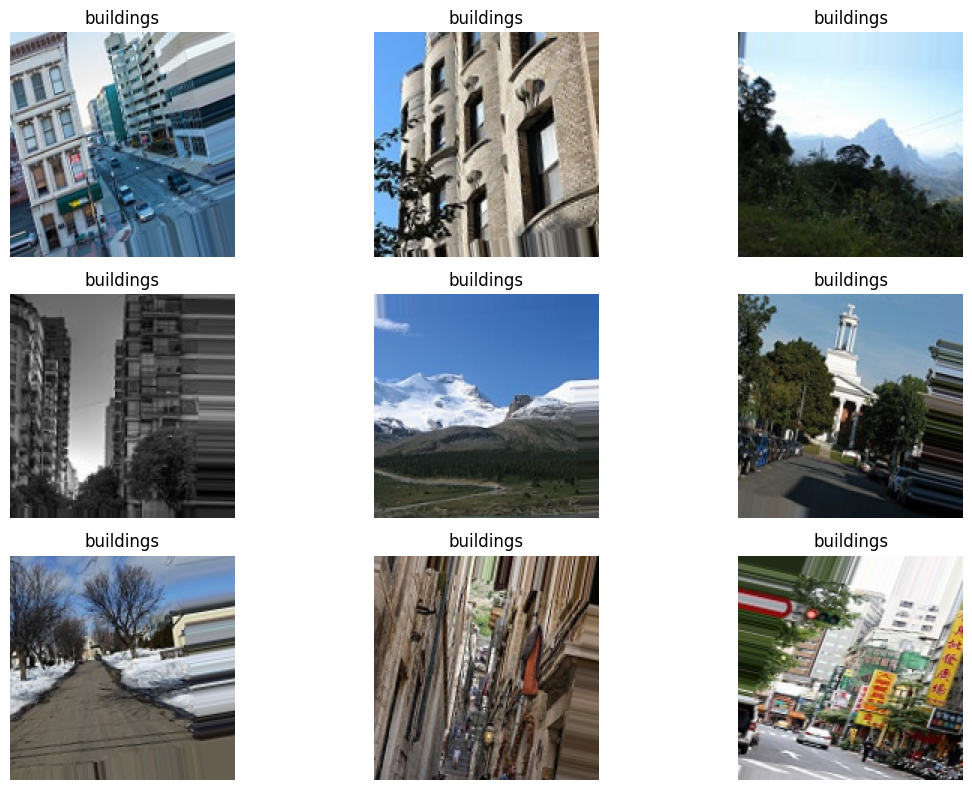

In [2]:
def plot_samples(images, labels, categories):
    plt.figure(figsize=(12, 8))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(categories[np.argmax(labels[i])])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Getting a batch of training images and labels
images, labels = next(train_data)
plot_samples(images, labels, categories)


**2. Model Architecture:**

* Design a CNN model with at least 3 convolutional layers, followed by
pooling layers and fully connected (dense) layers.

* Experiment with different kernel sizes, activation functions (such as
ReLU), and pooling strategies (max-pooling or average pooling).

* Implement batch normalization and dropout techniques to improve the
generalization of your model.

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Building the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        256       
 chNormalization)                                                
                                                      

**Interpretation**

Convolutional Neural Network (CNN) with a series of convolutional and pooling layers to extract spatial features from images, followed by dense (fully connected) layers to interpret those features and classify images into categories.

**3. Model Training:**

* Split the dataset into training and test sets.

* Compile the model using an appropriate loss function (categorical cross-
entropy) and an optimizer (such as Adam or SGD).

* Train the model for a sufficient number of epochs, monitoring the training
and validation accuracy.

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Training the model
history = model.fit(train_data, validation_data=test_data, epochs=10)


Epoch 1/10


439/439 [==============================] - 251s 564ms/step - loss: 290567.9375 - accuracy: 0.4171 - val_loss: 303112.2188 - val_accuracy: 1.0000
Epoch 2/10
439/439 [==============================] - 244s 556ms/step - loss: 1575505.7500 - accuracy: 0.3742 - val_loss: 1498718.7500 - val_accuracy: 1.0000
Epoch 3/10
439/439 [==============================] - 245s 559ms/step - loss: 3656914.0000 - accuracy: 0.3551 - val_loss: 2659758.5000 - val_accuracy: 1.0000
Epoch 4/10
439/439 [==============================] - 285s 648ms/step - loss: 6358180.5000 - accuracy: 0.3417 - val_loss: 4540265.0000 - val_accuracy: 1.0000
Epoch 5/10
439/439 [==============================] - 286s 652ms/step - loss: 9551504.0000 - accuracy: 0.3363 - val_loss: 7143639.0000 - val_accuracy: 1.0000
Epoch 6/10
439/439 [==============================] - 339s 771ms/step - loss: 13145102.0000 - accuracy: 0.3264 - val_loss: 7683422.0000 - val_accuracy: 1.0000
Epoch 7/10
439/439 [==============================

**Interprettaion**

To train the model on the training set and evaluate it on the test set, aiming to achieve good accuracy on 
unseen data by optimizing the model's weights.

**4. Evaluation:**

* Evaluate the trained model on the test set and report the accuracy.

* Plot the training and validation accuracy/loss curves to visualize the
model's performance.

* Display the confusion matrix for the test set to analyze misclassified
samples.

94/94 [==============================] - 12s 129ms/step - loss: 11874909.0000 - accuracy: 1.0000
Test Accuracy: 1.00


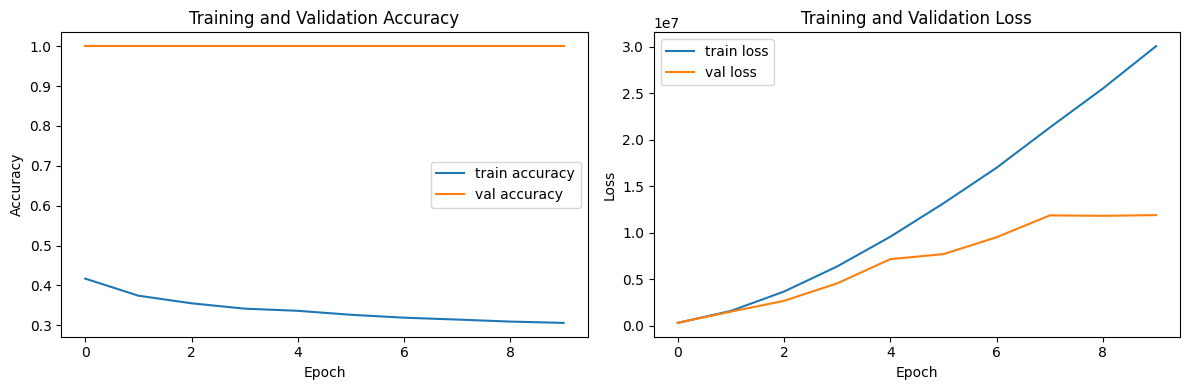

In [5]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2f}")

# Plotting training and validation accuracy/loss
def plot_training(history):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training(history)


**Interpretation**

To assess how well the model generalizes to new, unseen data by evaluating it on the test set and analyzing its performance.

94/94 [==============================] - 12s 115ms/step


c:\Users\GREESHMA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


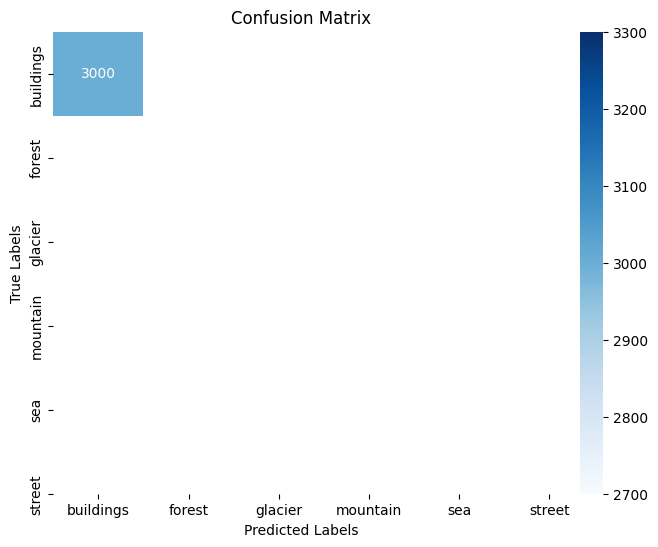

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get true labels and predictions for the test set
test_labels = test_data.classes
predictions = np.argmax(model.predict(test_data), axis=-1)

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**5. Optimization :**

* Experiment with data augmentation techniques (rotation, flipping,
zooming) to further improve the model’s performance.

* Fine-tune hyperparameters like learning rate, batch size, and the number
of filters in each layer.

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,         
    width_shift_range=0.2,      
    height_shift_range=0.2,    
    zoom_range=0.2,            
    horizontal_flip=True,      
    brightness_range=[0.8, 1.2]
)


test_datagen = ImageDataGenerator(rescale=1./255)


**Interpretation**

Techniques like rotation, flipping, and zooming create additional image variations, reducing overfitting by teaching the model to recognize categories across a wider range of perspectives and orientations.